### Flower Dataset

In [2]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 29.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 51.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 36.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Flower Traning

1. Train an artificial neural network for **flower species classification** using the training set of dataset 1.

    * Experiment with several hyperparameters of the network.
    
    * You are welcome to use any architecture or approach you wish.
    
    * Report performance results in training and validation sets.
    
    * Display the learning curves.

In [39]:
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
X_train = np.load('flower_species_classification/data_train.npy')
t_train = np.load('flower_species_classification/labels_train.npy')

# # Normalize the data (scale pixel values to [0, 1])
# X_train = X_train / 255.0
# Reshape X_train and X_val to match the model's input shape
X_train = X_train.reshape(-1, 300, 300, 3)
X_val = X_val.reshape(-1, 300, 300, 3)
X_train = X_train / 255.0
X_val = X_val / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(t_train, num_classes=10)
# from tensorflow.keras.utils import to_categorical

# y_train = to_categorical(y_train, num_classes=10)
# y_val = to_categorical(y_val, num_classes=10)


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [10]:
import joblib

In [43]:
joblib.dump(X_train, "X_train.pkl")
joblib.dump(X_val, "X_val.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_val, "y_val.pkl")

['y_val.pkl']

In [44]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/envs/aml/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
from tensorflow.keras.optimizers import Adam

In [47]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 156800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    20,070,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,165,066 (76.92 MB)

 Trainable params: 20,165,066 (76.92 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:


# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.1339 - loss: 3.0627 - val_accuracy: 0.2440 - val_loss: 1.9652
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.3187 - loss: 1.8714 - val_accuracy: 0.4729 - val_loss: 1.4961
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4587 - loss: 1.5657 - val_accuracy: 0.5753 - val_loss: 1.2977
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5450 - loss: 1.2816 - val_accuracy: 0.5813 - val_loss: 1.2550
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.6353 - loss: 1.0823 - val_accuracy: 0.6928 - val_loss: 0.9690
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7383 - loss: 0.7902 - val_accuracy: 0.6596 - val_loss: 1.0097
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8078 - loss: 0.5829 - val_accuracy: 0.6928 - val_loss: 0.9736
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8499 - loss: 0.4296 - val_accuracy: 0.6747 - val_loss:

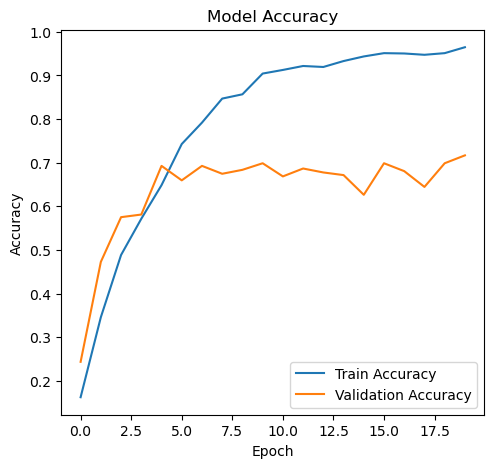

In [9]:
# Plot learning curves
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

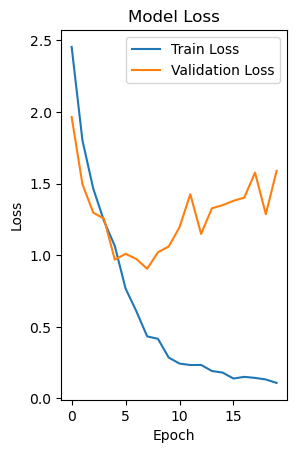

In [10]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


Validation Accuracy: 71.69%
Validation Loss: 1.5897


In [48]:
# Save the model
model.save('flower_species_classifier.keras')

### Car Training

2. Train an artificial neural network for **object detection** using the training set of dataset 2.

    * Experiment with several hyperparameters of the network.
    
    * You are welcome to use any architecture or approach you wish.
    
    * Report performance results in training and validation sets.
    
    * Display the learning curves.

In [14]:
pip install tensorflow matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [5]:
b_box = pd.read_csv('car_detection_dataset/train_bounding_boxes.csv')

In [6]:
N = len(b_box) # no. of training samples

# Create a numpy array with all images
for i in range(N): 
    filename='car_detection_dataset/training_images/'+b_box['image'][i]
    image = np.array(Image.open(filename))
    image_col = image.ravel()[:,np.newaxis]
    
    if i==0:
        X_train = image_col
    else:
        X_train = np.hstack((X_train, image_col))

# Training feature matrices
X_train = X_train.T

# Training labels
t_train = b_box.drop('image', axis=1).round().to_numpy().astype(int)

X_train.shape, t_train.shape



((559, 770640), (559, 4))

In [7]:
# Normalize pixel values
X_train = X_train / 255.0

# Reshape X_train to (N, Nx, Ny, Nz)
Nx, Ny, Nz = 380, 676, 3  # Dimensions of each RGB image
X_train = X_train.reshape(-1, Nx, Ny, Nz)

# Confirm new shape
print("X_train shape:", X_train.shape)
print("t_train shape:", t_train.shape)

X_train shape: (559, 380, 676, 3)
t_train shape: (559, 4)


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, t_train, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (447, 380, 676, 3)
Validation set shape: (112, 380, 676, 3)


In [12]:
joblib.dump(X_train, "X_train_C.pkl")
joblib.dump(X_val, "X_val_C.pkl")
joblib.dump(y_train, "y_train_C.pkl")
joblib.dump(y_val, "y_val_C.pkl")

['y_val_C.pkl']

In [13]:
# Define the model architecture
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(Nx, Ny, Nz)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(4, activation='linear')  # Predicts bounding box coordinates
])

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',  # Regression for bounding boxes
              metrics=['mse'])

/opt/anaconda3/envs/aml/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=3,  # Number of epochs to wait before stopping if no improvement
                               verbose=1,   # Print out when stopping occurs
                               restore_best_weights=True)  # Restore model weights from the best epoch

In [32]:
car_model = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - loss: 16433.6484 - mse: 16433.6484 - val_loss: 28588.2949 - val_mse: 28588.2949
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - loss: 14692.9238 - mse: 14692.9238 - val_loss: 28099.8125 - val_mse: 28099.8125
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - loss: 12582.0596 - mse: 12582.0596 - val_loss: 26342.8242 - val_mse: 26342.8242
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - loss: 15459.6035 - mse: 15459.6035 - val_loss: 25351.5156 - val_mse: 25351.5156
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - loss: 13739.5859 - mse: 13739.5859 - val_loss: 28110.3418 - val_mse: 28110.3418
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - loss: 12954.9453 - mse: 12954.9453 - val_loss: 27155.7129 - val_mse: 27155.7129
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - loss: 14496.8291 - mse: 14496.8291 - val_loss: 24415.5508 - val_mse: 24415.5508
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - loss: 12478.9043 - mse: 

In [33]:
# Saving the trained model
model2.save('car_detection_model.keras')

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def regression_metrics(y_true, y_pred):
    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    # Compute Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    # Compute IoU (Intersection over Union) for bounding boxes
    iou = calculate_iou(y_true, y_pred)  # Custom IoU function
    return mse, mae, iou

def calculate_iou(y_true, y_pred):
    """Calculate the average IoU (Intersection over Union) for bounding boxes."""
    n = len(y_true)
    ious = []
    for i in range(n):
        # Extract true and predicted box coordinates
        x1_true, y1_true, x2_true, y2_true = y_true[i]
        x1_pred, y1_pred, x2_pred, y2_pred = y_pred[i]

        # Compute intersection
        x1_inter = max(x1_true, x1_pred)
        y1_inter = max(y1_true, y1_pred)
        x2_inter = min(x2_true, x2_pred)
        y2_inter = min(y2_true, y2_pred)
        intersection_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

        # Compute union
        true_area = (x2_true - x1_true) * (y2_true - y1_true)
        pred_area = (x2_pred - x1_pred) * (y2_pred - y1_pred)
        union_area = true_area + pred_area - intersection_area

        # Compute IoU
        iou = intersection_area / union_area if union_area > 0 else 0
        ious.append(iou)

    return np.mean(ious)




In [35]:
# Predictions
y_train_pred = model2.predict(X_train)


# Calculate metrics for training data
train_mse, train_mae, train_iou = regression_metrics(y_train, y_train_pred)
print(f"Training MSE: {train_mse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Training IoU: {train_iou:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 829ms/step
Training MSE: 9341.6761
Training MAE: 62.0049
Training IoU: 0.1299


In [36]:
y_val_pred = model2.predict(X_val)
# Calculate metrics for validation data
val_mse, val_mae, val_iou = regression_metrics(y_val, y_val_pred)
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation IoU: {val_iou:.4f}")

# Evaluate on validation set
val_loss, val_mse = model2.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation MSE: {val_mse:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step
Validation MSE: 24415.5492
Validation MAE: 101.4631
Validation IoU: 0.0474
Validation Loss: 24415.5508
Validation MSE: 24415.5508


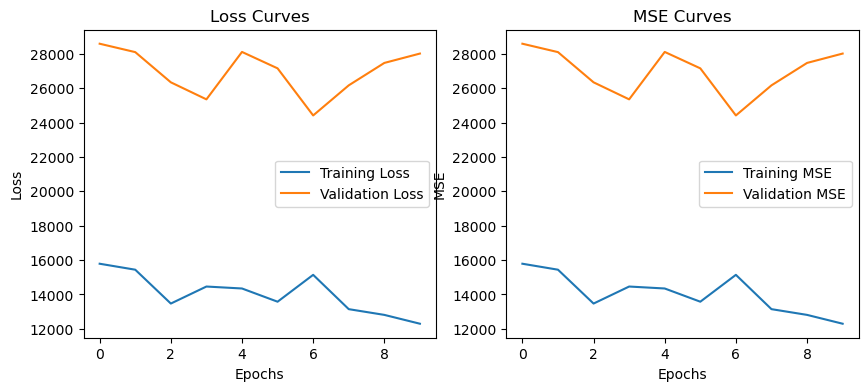

In [37]:
# Plot loss curves
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(car_model.history['loss'], label='Training Loss')
plt.plot(car_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(car_model.history['mse'], label='Training MSE')
plt.plot(car_model.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Curves')
plt.legend()

plt.show()


In [38]:
# Load no-car images and add to dataset
no_car_images = ['car_detection_dataset/testing_images/vid_5_25120.jpg']  # Paths to no-car images
no_car_labels = np.zeros((len(no_car_images), 4))

# Process no-car images
no_car_data = np.array([np.array(Image.open(img)) / 255.0 for img in no_car_images])
no_car_data = no_car_data.reshape(-1, Nx, Ny, Nz)

# Add to training set
X_train = np.vstack((X_train, no_car_data))
y_train = np.vstack((y_train, no_car_labels))

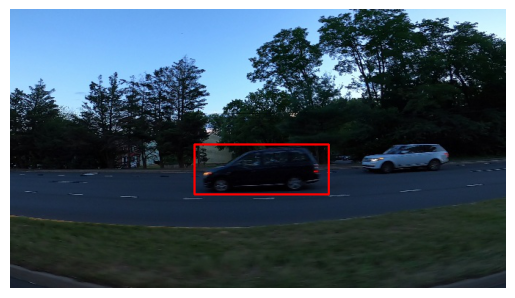

In [39]:

import cv2

def plot_image_with_b_box(image, b_box):
    img = (image * 255).astype(np.uint8)
    img_with_b_box = cv2.rectangle(img, 
                                  (b_box[0], b_box[1]), 
                                  (b_box[2], b_box[3]),
                                  (255, 0, 0), 2)
    plt.imshow(img_with_b_box)
    plt.axis('off')
    plt.show()

# Visualize a sample image
plot_image_with_b_box(X_val[0], y_val[0])

### Ques 3 

3. Discuss how you would validate performance in the test set given that no target labels are provided. Discuss also how you would address the case where no car is present in the image. For the latter, it may be useful consider all training images and add a fix target label (e.g. [0,0,0,0]) for all images without a car within it.

    * Consider the case where the exact bounding box location is not particularly the target. There an acceptable margin an error. Perhaps describe your approach in the context of overlapping Region of Interest (ROI).
    
    * You may use [MakeSenseAI](https://www.makesense.ai/) to create your own test labels (a small subset of test samples suffices) to demonstrate your validation metric.

#### SOLUTION

#### In the event that target labels for the test set are unavailable, we can try:

Qualitative Evaluation:

* Visual inspection: To determine whether test photographs accurately portray the vehicle, plot the model's projected bounding boxes on them.
Visualization technologies like matplotlib or OpenCV can be used to evaluate images by superimposing predicted bounding boxes on them.
Synthetic Labels with annotations:

* Create ground-truth bounding boxes in answer to the question by annotating a small portion of test photographs using tools like MakeSense.AI.
Use these annotations to compute validation metrics for bounding box identification, such as Mean Absolute Error (MAE), Intersection over Union (IoU), and recall/precision.
In the absence of accurate labels, the measure

* Choose a heuristic metric, like the percentage of projected images with a bounding box.
Determine the relative location of the bounding boxes in the image and their distribution (e.g., size consistency) using domain knowledge.



#### To address the pictures without a vehicle:
* Binary Classification Task: Develop the model to predict whether an automobile is present in an image by doing binary classification.
A fixed bounding box label, such as [0, 0, 0, 0], can be applied to images that don't feature a car.
* Model Training Using Examples Without Cars:           
To enhance the training dataset, add "no-car" photos with the labels [0, 0, 0, 0].
Use a hybrid loss function during training, such as Mean Squared Error on coordinates or Bounding Box Loss on photos featuring automobiles.
The classification task for identifying "no-car" photos uses binary cross-entropy loss.
* Setting a Bounding Box Threshold: If the bounding box confidence score is less than a certain level, the image should be categorized as "no car."

#### A margin of error should be taken into account when making bounding box predictions:

* Intersection over Union (IoU): IoU is a frequently used statistic to assess the accuracy of bounding boxes.
$IoU = Area of Union / Area of Overlap$
Establish a minimal IoU cutoff point (such as 0.5) to identify a "correct" forecast.
Interest Region (ROI):

* Pay attention to whether the bounding box adequately encloses the car rather than pixel-perfect coordinates:
Penalize boxes that are noticeably bigger or smaller.
Areas that overlap more than a predetermined threshold (such as 50%) may be deemed acceptable.

In [47]:
import os
import numpy as np
import cv2
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import load_model

# Paths to new dataset
images_dir = "car_detection_dataset/test_BB_Updated"
annotations_dir = "labels_my-project-name_2024-12-04-08-06-40"  # YOLO annotations directory

# Image dimensions (ensure these match your training dataset)
Nx, Ny, Nz = 380, 676, 3

# Function to load YOLO annotations
def load_yolo_annotations(annotation_path, img_width, img_height):
    """Convert YOLO annotations to absolute pixel coordinates."""
    with open(annotation_path, 'r') as f:
        lines = f.readlines()

    bboxes = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height

        # Convert from YOLO format to absolute coordinates
        x1 = x_center - (width / 2)
        y1 = y_center - (height / 2)
        x2 = x_center + (width / 2)
        y2 = y_center + (height / 2)
        bboxes.append([x1, y1, x2, y2])  # Append as absolute coordinates

    return np.array(bboxes)

# Load images and annotations
image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.jpg')])
annotation_files = sorted([f for f in os.listdir(annotations_dir) if f.endswith('.txt')])

X_new = []
y_new = []

for img_file, ann_file in zip(image_files, annotation_files):
    # Load and preprocess the image
    img_path = os.path.join(images_dir, img_file)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (Ny, Nx))  # Resize to match model input
    X_new.append(img_resized / 255.0)  # Normalize pixel values

    # Load corresponding YOLO annotation
    ann_path = os.path.join(annotations_dir, ann_file)
    bboxes = load_yolo_annotations(ann_path, Ny, Nx)  # Use resized dimensions
    y_new.append(bboxes)

# Convert to numpy arrays
X_new = np.array(X_new)
y_new = np.array(y_new, dtype=object)  # Use dtype=object for variable-length arrays

print("New dataset loaded:")
print("X_new shape:", X_new.shape)
print("Number of bounding boxes per image:", [len(b) for b in y_new])


New dataset loaded:
X_new shape: (11, 380, 676, 3)
Number of bounding boxes per image: [1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1]


In [48]:
# Load your trained model
# model = load_model('path_to_trained_model.h5')  # Replace with your model path

# Predict bounding boxes
y_new_pred = model2.predict(X_new)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_iou_normalized(y_true, y_pred):
    """Calculate IoU for bounding boxes in normalized coordinates."""
    ious = []
    for i in range(len(y_true)):
        # Extract true and predicted box coordinates
        x1_true, y1_true, x2_true, y2_true = y_true[i]
        x1_pred, y1_pred, x2_pred, y2_pred = y_pred[i]

        # Calculate intersection
        x1_inter = max(x1_true, x1_pred)
        y1_inter = max(y1_true, y1_pred)
        x2_inter = min(x2_true, x2_pred)
        y2_inter = min(y2_true, y2_pred)
        intersection_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

        # Calculate union
        true_area = (x2_true - x1_true) * (y2_true - y1_true)
        pred_area = (x2_pred - x1_pred) * (y2_pred - y1_pred)
        union_area = true_area + pred_area - intersection_area

        # Calculate IoU
        iou = intersection_area / union_area if union_area > 0 else 0
        ious.append(iou)

    return np.mean(ious)

# Compute MSE and MAE directly on normalized coordinates
mse = mean_squared_error(np.vstack(y_new), np.vstack(y_new_pred))
mae = mean_absolute_error(np.vstack(y_new), np.vstack(y_new_pred))

# Compute IoU
ious = [calculate_iou_normalized(y_true, y_pred) 
        for y_true, y_pred in zip(y_new, y_new_pred)]
mean_iou = np.mean(ious)

# Print metrics
print(f"New Dataset MSE (normalized): {mse:.4f}")
print(f"New Dataset MAE (normalized): {mae:.4f}")
print(f"New Dataset IoU (normalized): {mean_iou:.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [15, 11]